<a href="https://colab.research.google.com/github/Ashishsahu26/Customer-Support-Ticket-Operations-Analysis/blob/main/customer_support_tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/Banking_complaint_dataset/Customer_support_ticketss.csv'  # replace with your local path if needed
df = pd.read_csv(path, encoding='latin1')


In [48]:
print(df.tail())

      Ticket ID Customer Name Customer Email  Customer Age Customer Gender  \
8464        NaN           NaN            NaN           NaN             NaN   
8465        NaN           NaN            NaN           NaN             NaN   
8466        NaN           NaN            NaN           NaN             NaN   
8467        NaN           NaN            NaN           NaN             NaN   
8468        NaN           NaN            NaN           NaN             NaN   

     Product Purchased Date of Purchase Ticket Type Ticket Subject  \
8464               NaN              NaN         NaN            NaN   
8465               NaN              NaN         NaN            NaN   
8466               NaN              NaN         NaN            NaN   
8467               NaN              NaN         NaN            NaN   
8468               NaN              NaN         NaN            NaN   

     Ticket Description Ticket Status Resolution Ticket Priority  \
8464                NaN           NaN     

In [49]:
list = df.columns
print(list)
print(list.shape)
print(df.shape)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
(17,)
(8469, 17)


In [50]:
# Drop rows where Ticket ID is NaN or null
df = df.dropna(subset=['Ticket ID'])


In [51]:
print(df.shape)

(4999, 17)


In [52]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1.0,Marisa Obrien,carrollallison@example.com,32.0,Other,GoPro Hero,3/22/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,6/1/2023 12:15,NaN,NaN
1,2.0,Jessica Rios,clarkeashley@example.com,42.0,Female,LG Smart TV,5/22/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,6/1/2023 16:45,NaN,NaN
2,3.0,Christopher Robbins,gonzalestracy@example.com,48.0,Other,Dell XPS,7/14/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,6/1/2023 11:14,6/1/2023 18:05,3.0
3,4.0,Christina Dillon,bradleyolson@example.org,27.0,Female,Microsoft Office,11/13/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,6/1/2023 7:29,6/1/2023 1:57,3.0
4,5.0,Alexander Carroll,bradleymark@example.com,67.0,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,6/1/2023 0:12,6/1/2023 19:53,1.0


In [53]:
# Drop rows with missing Ticket ID
df.dropna(subset=['Ticket ID'], inplace=True)

# Convert time columns to numeric
df['First Response Time'] = pd.to_numeric(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_numeric(df['Time to Resolution'], errors='coerce')




In [54]:
print(df.shape)

(4999, 17)


In [55]:
# Handle missing values (numeric)
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      3376
Ticket Priority                    0
Ticket Channel                     0
First Response Time             4999
Time to Resolution              4999
Customer Satisfaction Rating       0
dtype: int64


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

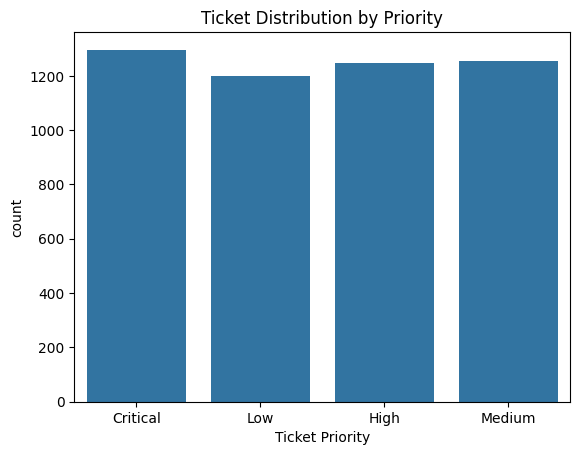

In [57]:
sns.countplot(x='Ticket Priority', data=df)
plt.title("Ticket Distribution by Priority")
plt.show()


In [58]:
df['Time to Resolution'].isna().sum(), df.shape[0]


(np.int64(4999), 4999)

In [59]:
df['Time to Resolution'].dtype


dtype('float64')

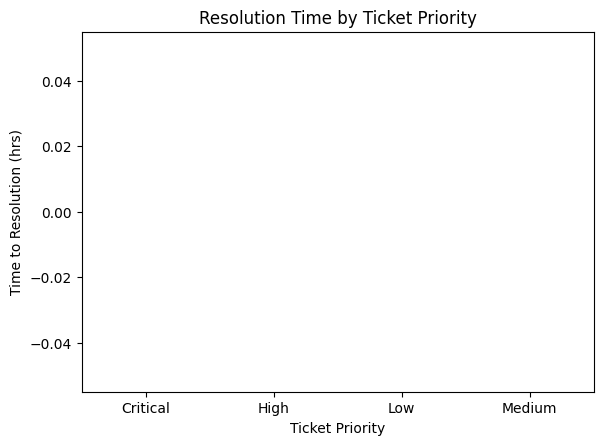

In [60]:
df.boxplot(
    column='Time to Resolution',
    by='Ticket Priority',
    grid=False
)

plt.title("Resolution Time by Ticket Priority")
plt.suptitle("")
plt.xlabel("Ticket Priority")
plt.ylabel("Time to Resolution (hrs)")
plt.show()


In [63]:
plot_df = df.dropna(subset=['Time to Resolution', 'Ticket Priority'])



In [64]:
#  Ticket Volume Analysis
#  Ticket Priority distribution
#  Ticket Channel analysis
#  Ticket Status breakdown
#  Customer Demographics
#  Satisfaction Rating analysis (if available

In [65]:
df['Ticket Priority'].value_counts()


,count
Ticket Priority,
Critical,1296
Medium,1254
High,1248
Low,1201


In [66]:
df['Ticket Status'].value_counts(normalize=True) * 100


,proportion
Ticket Status,
Pending Customer Response,34.286857
Open,33.246649
Closed,32.466493


In [67]:
df.groupby('Ticket Channel')['Ticket ID'].count()


,Ticket ID
Ticket Channel,
Chat,1240
Email,1245
Phone,1267
Social media,1247


In [68]:
df['Customer Satisfaction Rating'].value_counts()


,count
Customer Satisfaction Rating,
3.0,3708
5.0,334
1.0,323
2.0,319
4.0,315
